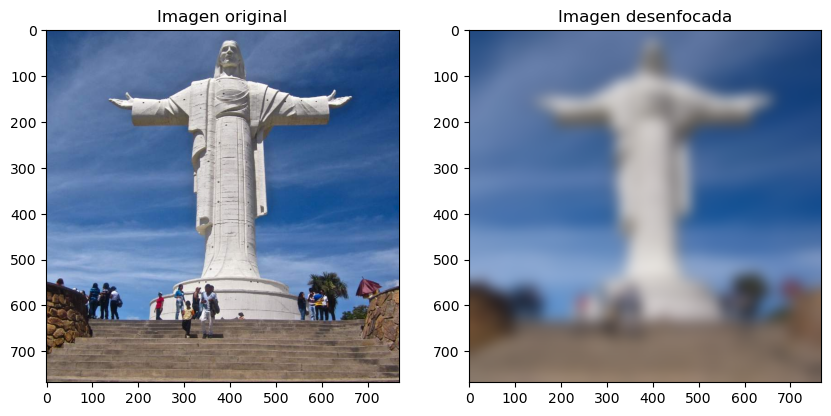

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('cristo.jpg')

imagen2 = cv2.imread('cristo.jpg')

imagen_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

_, umbral_inc_bi = cv2.threshold(imagen_gray, 127, 255, cv2.THRESH_BINARY_INV) 
_, a = cv2.threshold(umbral_inc_bi, 127, 255, cv2.THRESH_BINARY_INV) 

_, umbralbi = cv2.threshold(imagen_gray, 127, 255, cv2.THRESH_BINARY)

_,umb_tozero_inv=cv2.threshold(imagen_gray,127,255,cv2.THRESH_TOZERO_INV)

mascara = np.zeros_like(umb_tozero_inv, dtype=np.uint8)

contornos, _ = cv2.findContours(umbralbi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(mascara, contornos, -1, (255, 255, 255), -1)

img_desenfocada = cv2.GaussianBlur(imagen, (95, 95), 0)

# Crear la imagen resultante aplicando la máscara desenfocada a la imagen original
img_resultante = np.copy(imagen)
img_resultante[mascara != 0] = img_desenfocada[mascara != 0]



plt.figure(figsize=(10, 5))

# Referencia al array de las imágenes
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen original')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_desenfocada, cv2.COLOR_BGR2RGB))
plt.title('Imagen desenfocada')

plt.show()


(-0.5, 767.5, 767.5, -0.5)

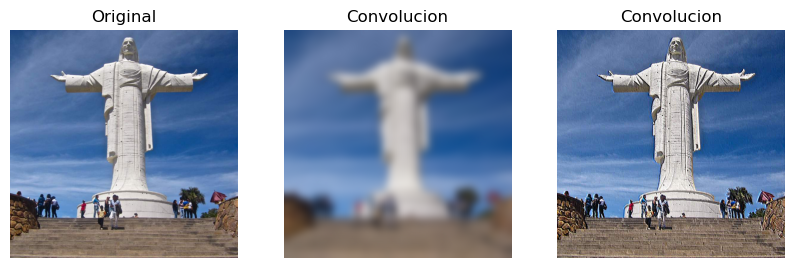

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

img = cv2.imread('cristo.jpg')

img_desenfocada = cv2.GaussianBlur(img, (95, 95), 0)

mascara = np.array([[1,-1,-1],[1,2,-1],[0,1,-1]])

imgfin = cv2.filter2D(img_desenfocada,-1,mascara)

imgfin2 = cv2.filter2D(img,-1,mascara)

imgfin3 = cv2.filter2D(imgfin,-1,imgfin2)

plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(132)
plt.imshow(cv2.cvtColor(imgfin, cv2.COLOR_BGR2RGB))
plt.title('Convolucion')
plt.axis('off')

plt.subplot(133)
plt.imshow(cv2.cvtColor(imgfin2, cv2.COLOR_BGR2RGB))
plt.title('Convolucion')
plt.axis('off')





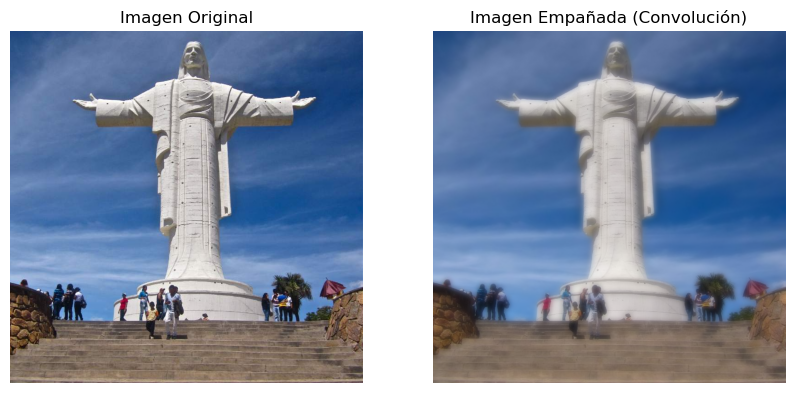

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('cristo.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

imagen_desenfocada = cv2.GaussianBlur(img, (41, 41), 0)

# Aplicar la gradiente a la imagen
#imagen_con_gradiente = cv2.addWeighted(imagen, 0.5, gradiente, 0.5, 0)

img_fin = cv2.addWeighted(img, 0.3, imagen_desenfocada, 0.7, 0)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagen Empañada (Convolución)')
plt.imshow(img_fin)
plt.axis('off')

plt.show()
